<a href="https://colab.research.google.com/github/MaliheDahmardeh/World-Development-Indicators/blob/main/WDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The "World Development Indicators" from the World Bank contain over a thousand annual indicators of economic development from hundreds of countries around the world that is from 1960 to 2016. This dataset contains over 1,500 indicators related to various social and economic issues across countries and regions of the world. Some of the indicators related to social policies and issues include:

- Poverty headcount ratio
- Access to improved water sources
- Access to improved sanitation facilities
- Infant mortality rate
- Maternal mortality rate
- Primary completion rate
- Secondary completion rate
- Tertiary completion rate
- Unemployment rate
- Income share held by lowest 20%

There are also indicators related to crime rates and technology issues, such as:

- Homicide rate
- Intentional homicides per 100,000 people
- Mobile cellular subscriptions per 100 people
- Internet users per 100 people

Using this dataset, one could conduct various correlation analyses between population rates and these social and economic indicators.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import os
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
from plotly.offline import download_plotlyjs,init_notebook_mode, plot
init_notebook_mode(connected=True)
# cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

#Import DataSet

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
!mkdir "/content/drive/My Drive/data"
os.listdir('/content/drive/MyDrive/data')

Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/My Drive/data’: File exists


['Country.csv', 'Indicators.csv']

In [3]:
path = '/content/drive/MyDrive/data/Indicators.csv'
df = pd.read_csv(path)

In [4]:
df

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
...,...,...,...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,3.600000e+01
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,9.000000e+01
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,2.420000e+02
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.300000e+00


#Data cleaning

In [5]:
# Check for missing values in the dataset
print('Missing values:\n', df.isnull().sum())

Missing values:
 CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64


In [6]:
# Check for Duplicated values in the dataset
print('Duplicated values:\n', df.duplicated().sum())

Duplicated values:
 0


#Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [8]:
# Check the columns of the dataset
print('Columns:',df.columns)

# Check the shape of the dataset
print('Shape:', df.shape)

# Check the first few rows of the dataset
print('Head:\n', df.head())

# Check the data types of the columns
print('Data types:\n', df.dtypes)

# Check basic statistics of the numerical columns
print('Summary statistics:\n', df.describe())

Columns: Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')
Shape: (5656458, 6)
Head:
   CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   

    IndicatorCode  Year         Value  
0     SP.ADO.TFRT  1960  1.335609e+02  
1     SP.POP.DPND  1960  8.779760e+01  
2  SP.POP.DPND.OL  1960  6.634579e+00  
3  SP.POP.DPND.YG  1960  8.102333e+01  
4  MS.MIL.XPRT.KD  1960  3.000000e+06  
Data types:
 CountryName       object
CountryCode       object
IndicatorName     object
IndicatorCode     object
Year        

In [9]:
# How many unique country codes and indicator names are there ? 
countries = df['CountryCode'].unique().tolist()
indicators = df['IndicatorName'].unique().tolist()
print('How many unique country codes and indicator names are there?')
print('Contries size: %d' % len(countries))
print('Indicators size: %d' % len(indicators))

How many unique country codes and indicator names are there?
Contries size: 247
Indicators size: 1344


In [10]:
# How many unique Years are there ? 
Year = df['Year'].unique().tolist()
print('Year size: %d' % len(Year))
print('Years list:',Year)

Year size: 56
Years list: [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [11]:
#presentation of selected indicators
indicator_list = ['SP.DYN.CBRT.IN',  #Birth rate, crude (per 1,000 people) (0)
              'SP.DYN.CDRT.IN',  #Death rate, crude (per 1,000 people) (1)
              'SP.POP.GROW', #Population growth (annual %) (2)
              'SP.POP.65UP.TO.ZS',  #Population ages 65 and above (% of total) (3)
              'SP.POP.0014.TO.ZS',  #Population, ages 0-14 (% of total) (4) 
              'SP.POP.1564.TO.ZS',  #Population, ages 15-64 (% of total) (5)
              'SP.DYN.LE00.FE.IN',  #Life expectancy at birth, female (years) (6)
              'SP.DYN.LE00.MA.IN',  #Life expectancy at birth, male (years) (7)
              'SP.DYN.LE00.IN',  #Life expectancy at birth, total (years) (8)
              'EN.ATM.CO2E.KT',  #CO2 emissions (kt) (9)
              'EG.USE.PCAP.KG.OE',  #Energy use (kg of oil equivalent per capita) (10)
              'EG.USE.ELEC.KH.PC',  #Electric power consumption (kWh per capita) (11)
              'NE.EXP.GNFS.ZS', #Exports of goods and services (% of GDP) (12)
              'NE.IMP.GNFS.ZS', #Imports of goods and services (% of GDP) (13)
              'NE.TRD.GNFS.ZS', #Trade (% of GDP) (14)
              'FP.CPI.TOTL', #Consumer price index (2010 = 100) (15)
              'NY.GDP.PCAP.CD', #GDP per capita (current US$) (16)
              'NY.GDP.PCAP.KD.ZG'] #GDP per capita growth (annual %) (17)  

Let's do comparison between countries, I have selected Iran, Italy and USA

In [12]:
#I need only Italy, United States and Iran
china = df.loc[df['CountryName'] == 'China']
USA = df.loc[df['CountryName'] == 'United States']
Italy = df.loc[df['CountryName'] == 'Italy']

In [13]:
#No empty values
china.isna().sum(), USA.isna().sum(), Italy.isna().sum()

(CountryName      0
 CountryCode      0
 IndicatorName    0
 IndicatorCode    0
 Year             0
 Value            0
 dtype: int64,
 CountryName      0
 CountryCode      0
 IndicatorName    0
 IndicatorCode    0
 Year             0
 Value            0
 dtype: int64,
 CountryName      0
 CountryCode      0
 IndicatorName    0
 IndicatorCode    0
 Year             0
 Value            0
 dtype: int64)

In [14]:
#plot function for charts
def plot_indicator(indicator, indicator2, indicator3):
    china_loc = china[['IndicatorName','Year','Value']][china['IndicatorCode']==indicator]
    x_china = china_loc['Year']
    y_china = china_loc['Value']
    title = china_loc['IndicatorName'].iloc[0]
    Italy_loc = Italy[['IndicatorName','Year','Value']][Italy['IndicatorCode']==indicator]
    x_Italy = Italy_loc['Year']
    y_Italy = Italy_loc['Value']
    USA_loc = USA[['IndicatorName','Year','Value']][USA['IndicatorCode']==indicator]
    x_USA = USA_loc['Year']
    y_USA = USA_loc['Value']
    
    china_loc2 = china[['IndicatorName','Year','Value']][china['IndicatorCode']==indicator2]
    x_china2 = china_loc2['Year']
    y_china2 = china_loc2['Value']
    title2 = china_loc2['IndicatorName'].iloc[0]
    Italy_loc2 = Italy[['IndicatorName','Year','Value']][Italy['IndicatorCode']==indicator2]
    x_Italy2 = Italy_loc2['Year']
    y_Italy2 = Italy_loc2['Value']
    USA_loc2 = USA[['IndicatorName','Year','Value']][USA['IndicatorCode']==indicator2]
    x_USA2 = USA_loc2['Year']
    y_USA2 = USA_loc2['Value']
    
    china_loc3 = china[['IndicatorName','Year','Value']][china['IndicatorCode']==indicator3]
    x_china3 = china_loc3['Year']
    y_china3 = china_loc3['Value']
    title3 = china_loc3['IndicatorName'].iloc[0]
    Italy_loc3 = Italy[['IndicatorName','Year','Value']][Italy['IndicatorCode']==indicator3]
    x_Italy3 = Italy_loc3['Year']
    y_Italy3 = Italy_loc3['Value']
    USA_loc3 = USA[['IndicatorName','Year','Value']][USA['IndicatorCode']==indicator3]
    x_USA3 = USA_loc3['Year']
    y_USA3 = USA_loc3['Value']
    
    plt.figure(figsize=(16,8))
    
    plt.subplot(1,3,1)
    plt.plot(x_china,y_china,label='China', color='green')
    plt.plot(x_Italy,y_Italy,label='Italy', color='red')
    plt.plot(x_USA,y_USA,label='USA', color='blue')
    plt.title(title)
    plt.grid(color = 'gray', linestyle = '--')
    plt.xlim(1970)
    plt.legend(loc='upper center')
    
    plt.subplot(1,3,2)
    plt.plot(x_china2,y_china2,label='China', color='green')
    plt.plot(x_Italy2,y_Italy2,label='Italy', color='red')
    plt.plot(x_USA2,y_USA2,label='USA', color='blue')
    plt.title(title2)
    plt.grid(color = 'gray', linestyle = '--')
    plt.xlim(1970)
    plt.legend(loc='upper center')
    
    plt.subplot(1,3,3)
    plt.plot(x_china3,y_china3,label='China', color='green')
    plt.plot(x_Italy3,y_Italy3,label='Italy', color='red')
    plt.plot(x_USA3,y_USA3,label='USA', color='blue')
    plt.title(title3)
    plt.grid(color = 'gray', linestyle = '--')
    plt.xlim(1970)
    plt.legend(loc='upper center')
    
    plt.show()

GDP per capita in Italy has been less than in the USA almost every year since 1970. The development of GDP in USA has been much more volatile than in the Italy.
GDP per capita in China is far behind Italy and USA, but their annual GDP growth % has been much higher, so in the future China bypasses Italy and the USA if the growth continues.

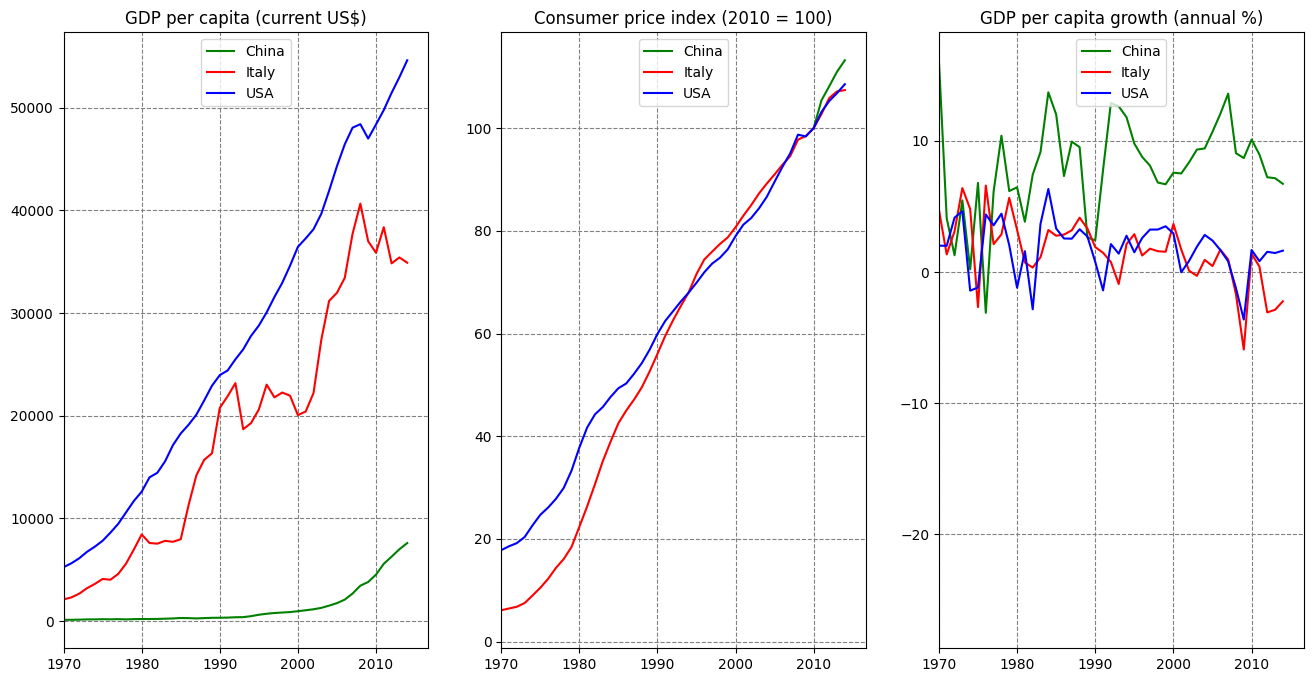

In [15]:
plot_indicator(indicator_list[16], indicator_list[15], indicator_list[17])

In [16]:
print('Average GDP per capita growth annual %')
print('China:', china.loc[china['IndicatorCode'] == 'NY.GDP.PCAP.KD.ZG', 'Value'].values.astype('float').mean().round(2))
print('Italy:', Italy.loc[Italy['IndicatorCode'] == 'NY.GDP.PCAP.KD.ZG', 'Value'].values.astype('float').mean().round(2))
print('USA:', USA.loc[USA['IndicatorCode'] == 'NY.GDP.PCAP.KD.ZG', 'Value'].values.astype('float').mean().round(2))

Average GDP per capita growth annual %
China: 6.87
Italy: 2.12
USA: 2.07


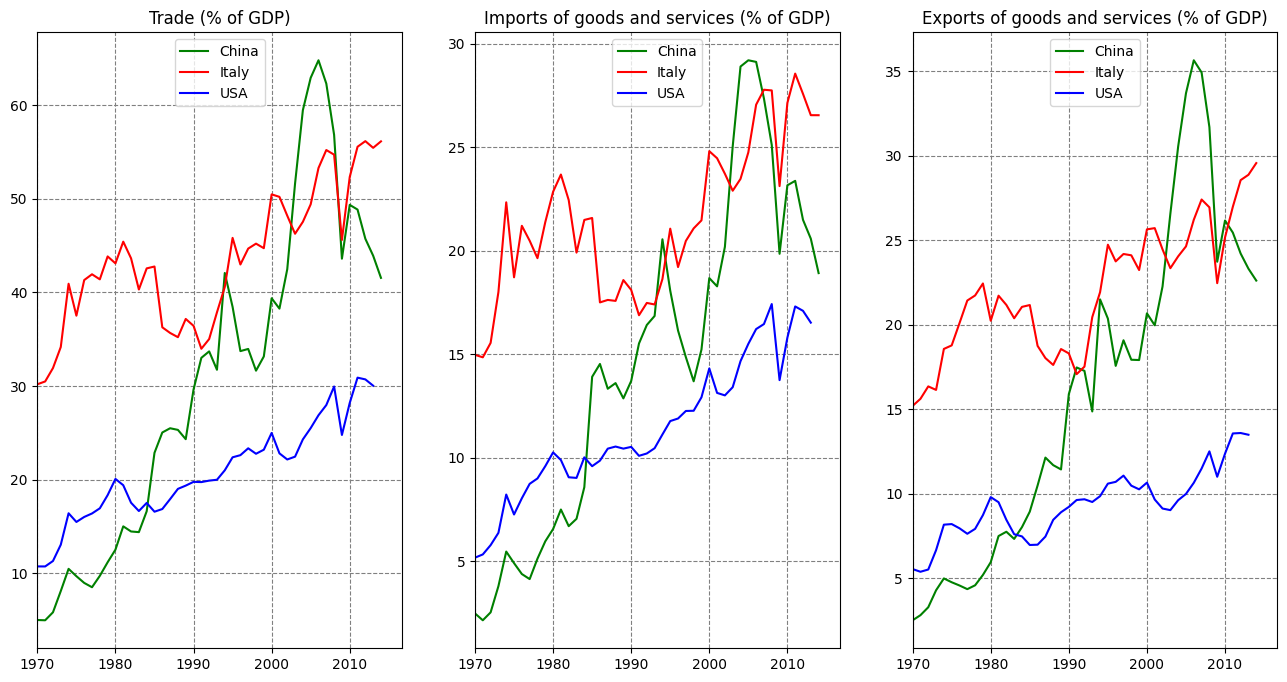

In [17]:
plot_indicator(indicator_list[14], indicator_list[13], indicator_list[12])

Life expectancy has clearly increased in each of the countries being compared since the 1970s. we can see that Italy has a higher life expectancy than other two countries.
Women are assumed to live longer than men.

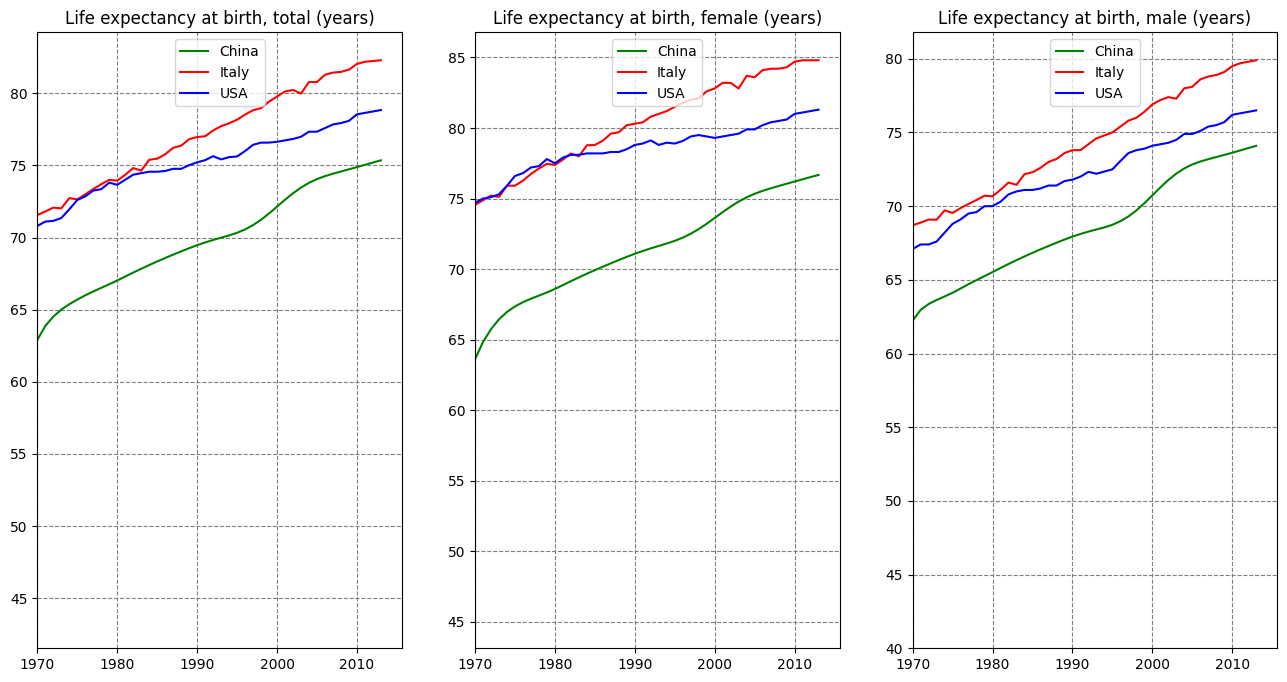

In [18]:
plot_indicator(indicator_list[8], indicator_list[6], indicator_list[7])

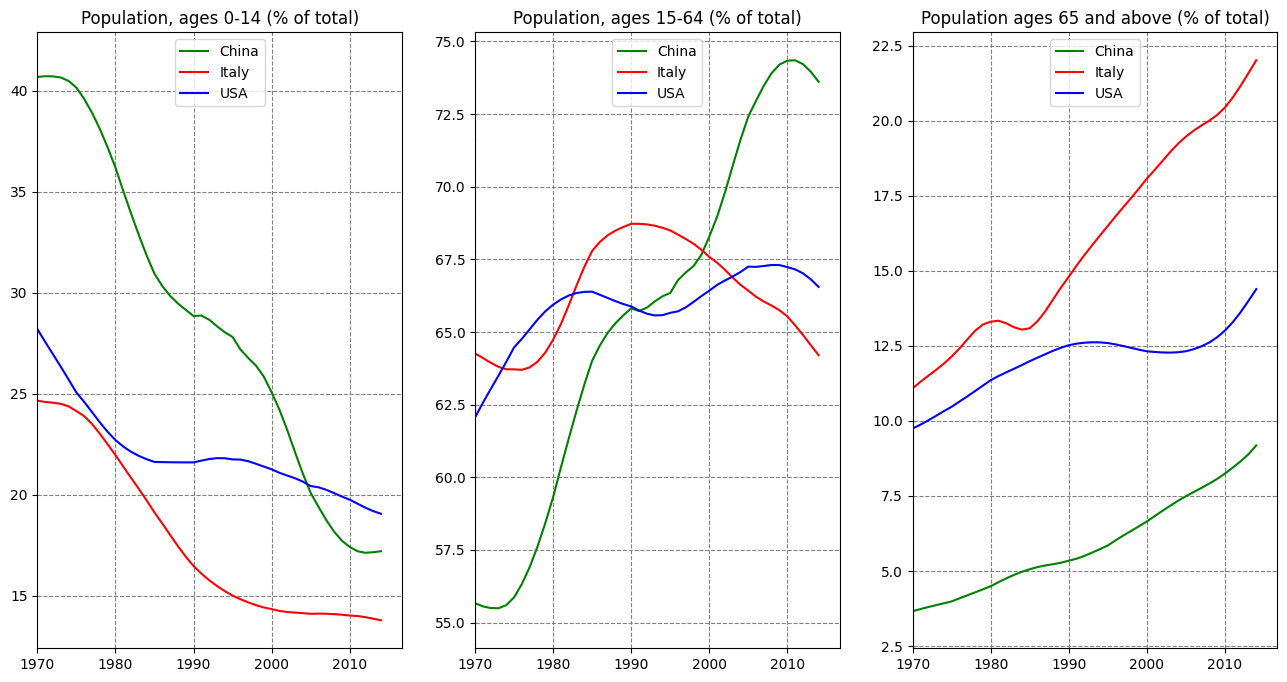

In [19]:
plot_indicator(indicator_list[4], indicator_list[5], indicator_list[3])

China's CO2 emissions have clearly overtaken the US in the 21st century.
Even the slightest increase in per capita energy source consumption in China has a huge impact in CO2 emissions on a global scale. Although USA's  electricity power consumption is higher, it seems to have downward trend in the future, while China has had an upward trend since the beginning.

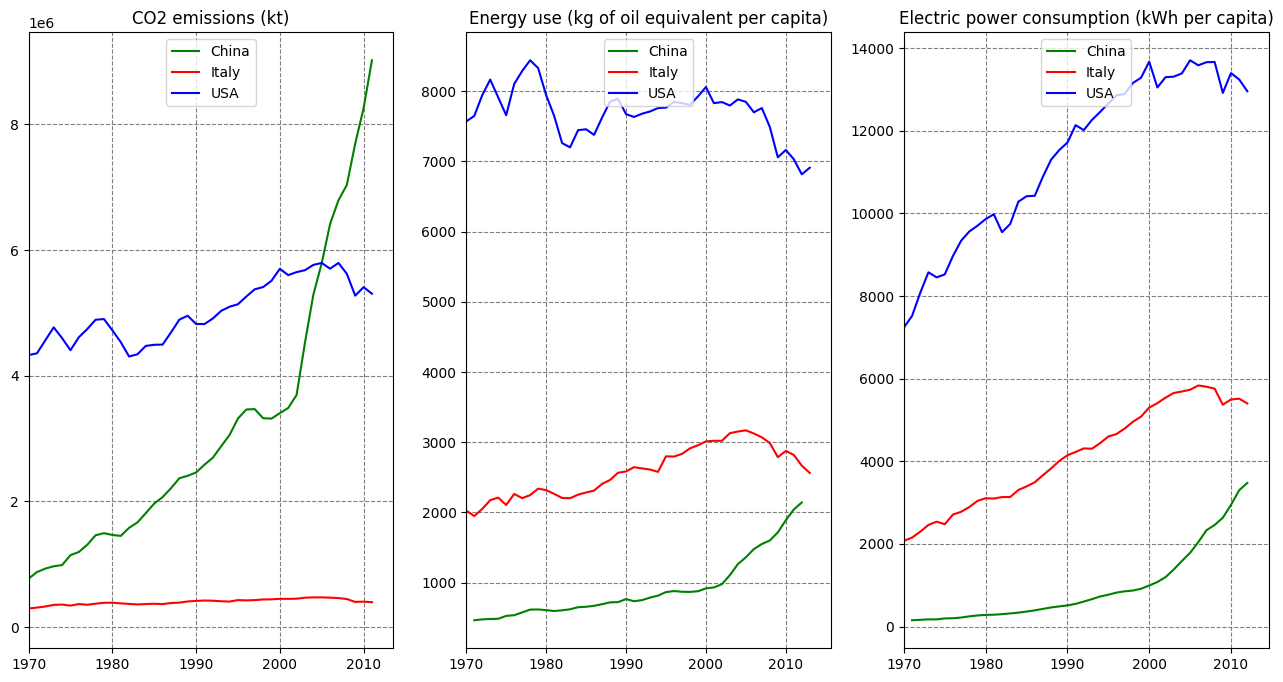

In [20]:
plot_indicator(indicator_list[9], indicator_list[10], indicator_list[11])

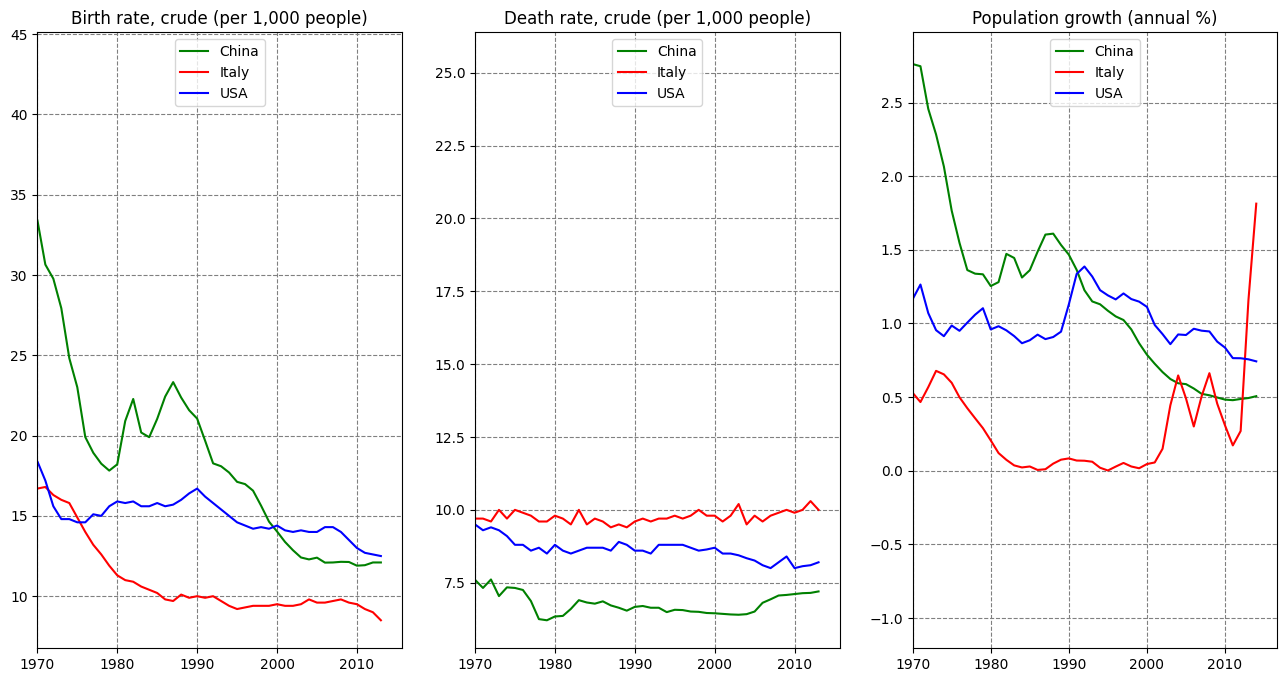

In [21]:
plot_indicator(indicator_list[0], indicator_list[1], indicator_list[2])

#Correlation

In [22]:
# Select two indicators, Life expectancy at birth, total (years) and GDP per capita (current US$) to compute the correlation
indicator1 = 'SP.DYN.LE00.IN'  # Life expectancy at birth, total (years)
indicator2 = 'NY.GDP.PCAP.CD'  # GDP per capita (current US$)

# Subset the data to include only the relevant indicators
subset = df.loc[df['IndicatorCode'].isin([indicator1, indicator2])]

# Pivot the data to have indicators as columns and countries as rows
subset = subset.drop_duplicates(['CountryCode', 'IndicatorCode'])
pivoted = subset.pivot(index='CountryCode', columns='IndicatorCode', values='Value')

# Compute the correlation between the two indicators
corr = pivoted.corr().loc[indicator1, indicator2]

print(f"The correlation between {indicator1} and {indicator2} is {corr:.2f}")

The correlation between SP.DYN.LE00.IN and NY.GDP.PCAP.CD is 0.30


In this case, a correlation coefficient of 0.30 suggests a weak positive correlation between life expectancy and GDP per capita, but it's important to keep in mind that correlation does not imply causation.

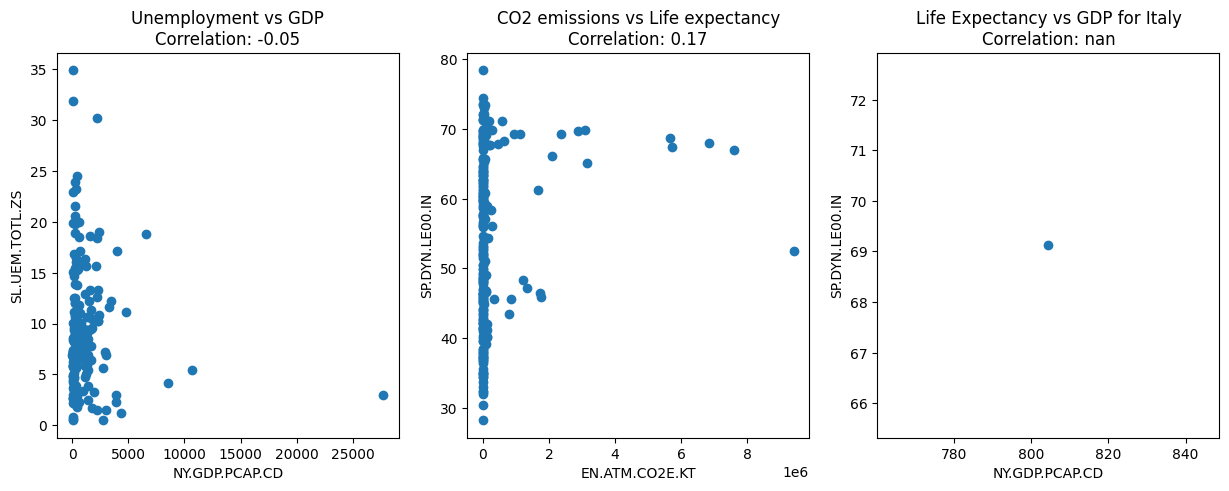

In [30]:
# Select the indicators we're interested in
indicator1 = 'SL.UEM.TOTL.ZS' # Unemployment, total (% of total labor force)
indicator2 = 'NY.GDP.PCAP.CD' # GDP per capita (current US$)
indicator3 = 'SP.DYN.LE00.IN' # Life expectancy at birth, total (years)
indicator4 = 'EN.ATM.CO2E.KT' # CO2 emissions (kt)

# Subset the data to include only the relevant indicators and Italy
subset_italy = df.loc[(df['CountryName'] == 'Italy') & df['IndicatorCode'].isin([indicator1, indicator2, indicator3])]
subset_world = df.loc[df['IndicatorCode'].isin([indicator1, indicator2, indicator3, indicator4])]

# Remove duplicates
subset_italy = subset_italy.drop_duplicates(['CountryName', 'IndicatorCode'])
subset_world = subset_world.drop_duplicates(['CountryName', 'IndicatorCode'])

# Pivot the data to have indicators as columns and countries as rows
pivoted_italy = subset_italy.pivot(index='CountryName', columns='IndicatorCode', values='Value')
pivoted_world = subset_world.pivot(index='CountryName', columns='IndicatorCode', values='Value')

# Compute the correlations
corr_italy = pivoted_italy.corr().loc[indicator3, indicator2]
corr_unemp_gdp = pivoted_world.corr().loc[indicator1, indicator2]
corr_co2_life = pivoted_world.corr().loc[indicator4, indicator3]

# Create scatter plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(pivoted_world[indicator2], pivoted_world[indicator1])
axs[0].set_xlabel(indicator2)
axs[0].set_ylabel(indicator1)
axs[0].set_title(f"Unemployment vs GDP\nCorrelation: {corr_unemp_gdp:.2f}")

axs[1].scatter(pivoted_world[indicator4], pivoted_world[indicator3])
axs[1].set_xlabel(indicator4)
axs[1].set_ylabel(indicator3)
axs[1].set_title(f"CO2 emissions vs Life expectancy\nCorrelation: {corr_co2_life:.2f}")

axs[2].scatter(pivoted_italy[indicator2], pivoted_italy[indicator3])
axs[2].set_xlabel(indicator2)
axs[2].set_ylabel(indicator3)
axs[2].set_title(f"Life Expectancy vs GDP for Italy\nCorrelation: {corr_italy:.2f}")

plt.show()